In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Independent features with their description

**PassengerId**  A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** The planet the passenger will be debarking to.

**Age** The age of the passenger.

**VIP** Whether the passenger has paid for special VIP service during the voyage.

**RoomService**, **FoodCourt**, **ShoppingMall**, ***Spa**, **VRDeck** Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** The first and last names of the passenger.

**Transported** Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [13]:
df = pd.read_csv('spaceTrain.csv')
df = df.iloc[:,1:]
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
# Displays basic info about dataframe
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
## Missing Values in each independent variable
missing_values = pd.DataFrame({'Features':list(df.columns),'Missing Values':list(df.isnull().sum())})
missing_values

,Features,Missing Values
0,HomePlanet,201
1,CryoSleep,217
2,Cabin,199
3,Destination,182
4,Age,179
5,VIP,203
6,RoomService,181
7,FoodCourt,183
8,ShoppingMall,208
9,Spa,183


<AxesSubplot:xlabel='Features', ylabel='Missing Values'>

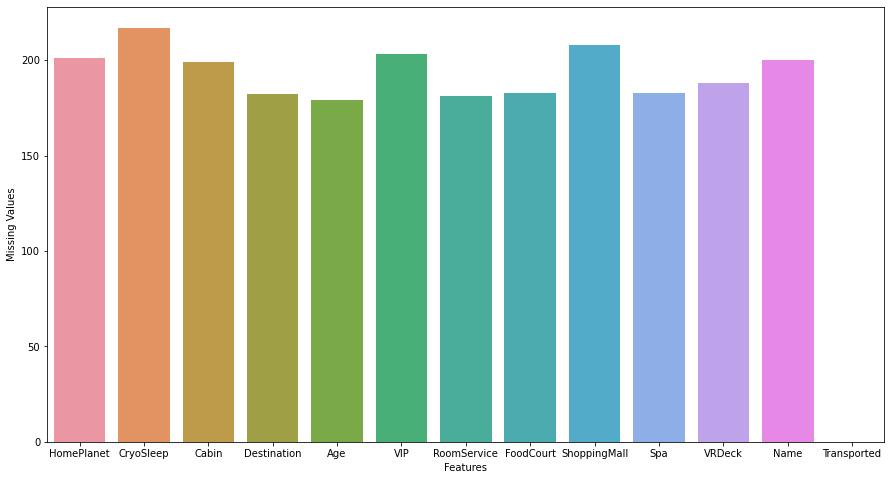

In [5]:
# Let's plot missing values
plt.figure(figsize=(15,8))
sns.barplot(data = missing_values,x='Features',y='Missing Values')

In [6]:
# Numerical and categorical features
no_of_numerical_features = 0
no_of_categorical_features = 0
for feat in df.columns:
    if df[feat].dtypes!='O': no_of_numerical_features+=1
    else : no_of_categorical_features+=1
print(f'There are {no_of_numerical_features} numerical features and {no_of_categorical_features} categorical features')

There are 7 numerical features and 6 categorical features


In [7]:
# Split the data in independent and dependent variable
features = df.drop(['Transported'],axis = 1)
target = df['Transported']

In [8]:
# Names of numerical and categorical features
numerical_features = [feat for feat in features.columns if features[feat].dtypes!='O']   # ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = [feat for feat in features.columns if features[feat].dtypes=='O'] # ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

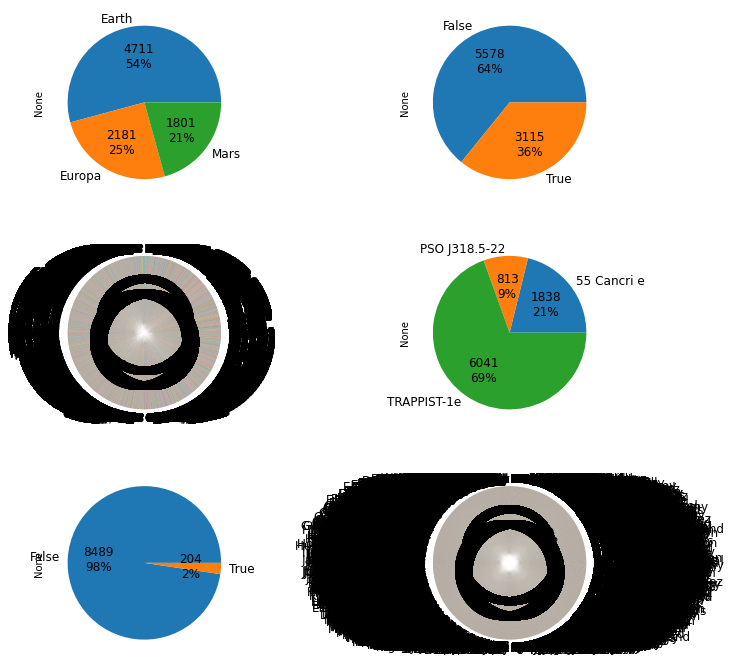

In [9]:
# Distribution of values in categorical features
plt.figure(figsize=(12,12))
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
j=1
for i in categorical_features:
    plt.subplot(3,2,j)
    df.groupby(i).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12})
    j+=1

In [10]:
# Correlation between each feature
correlations = features.corr()
correlations

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


<AxesSubplot:>

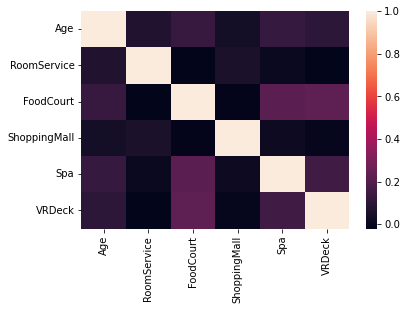

In [11]:
# Visualize the correlation using heatmap
sns.heatmap(correlations)

## Columns which are useless to process
- PassengerId
- Cabin
- Name

/home/harish/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/harish/

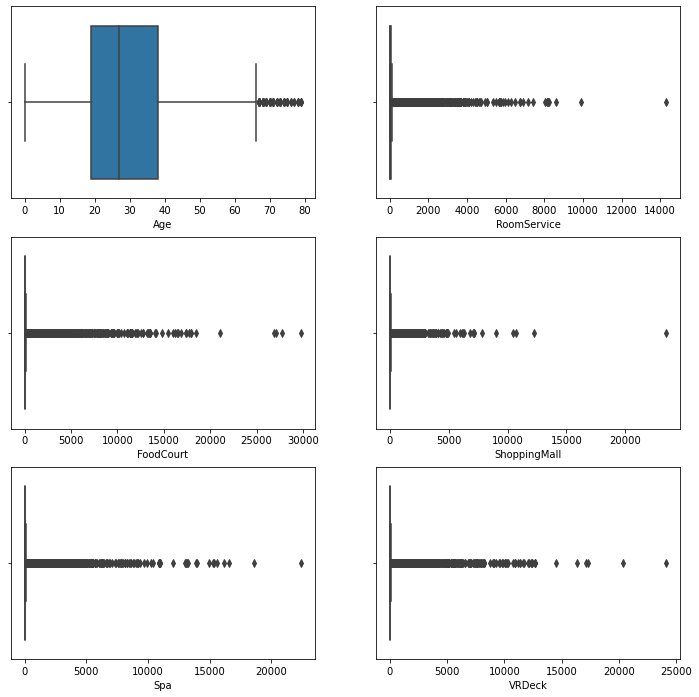

In [12]:
# Check for outliers

## For numerical features
plt.figure(figsize=(12,12))
i=1
for feat in numerical_features:
    plt.subplot(3,2,i)
    sns.boxplot(df[feat])
    i+=1


In [ ]:
# Now let's find some sense in our dataset, find some logic